<a href="https://colab.research.google.com/github/Kristina-Analyst/Python/blob/main/Customer_Segmentation_with_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Онлайн-магазин хоче провести сегментацію клієнтів за двома характеристиками:

browsing_time — кількість хвилин перегляду вебсторінки магазину;
purchase_amount — сума покупок (USD).
Твоє завдання:

Створи датафрейм зі стовпцями browsing_time та purchase_amount.

Застосуй алгоритм DBSCAN для кластеризації клієнтів. Підбери гіперпараметри eps та min_samples на свій розсуд. Експериментуй із різними значеннями цих параметрів. Візуалізуй отриманий результат.

Інтерпретуй результати. Якою вийшла кількість сегментів?**3** Як можна охарактеризувати отримані сегменти?

1 - мало часу на сайті (від 13хв до 17 хв), та мала сумма замовлень(40-60$)

2 - трохи більше часу на сайті(від 23хв до 27хв) та трохи більша сумма покупок(140-160$)

3 - середня кількість часу на сайті(від 38хв до 43хв) та середня покупок (190-210$)


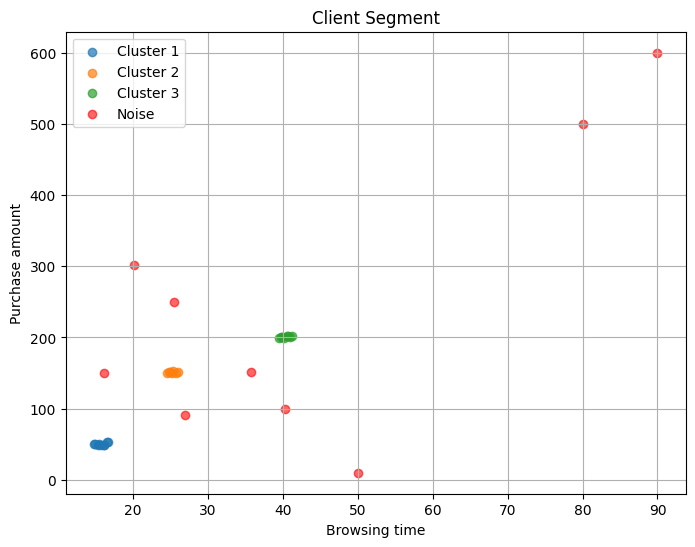

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN

browsing_time = [
    15.5, 16.2, 14.8, 15.3, 16.7, 27.0, 16.5, 15.8, 14.9, 16.1, 25.2, 24.8, 26.0,
    25.5, 16.2, 24.9, 25.7, 25.4, 24.6, 35.8, 40.3, 41.2, 39.5, 40.6, 39.8, 40.2,
    41.0, 40.7, 39.9, 20.1, 50.0, 80.0, 90.0
]

purchase_amount = [
    50.1, 48.5, 51.0, 49.3, 52.7, 90.9, 53.1, 49.5, 50.2, 48.8, 150.3, 152.0,
    151.2, 249.8, 150.6, 151.0, 150.5, 152.3, 149.9, 151.5, 100.1, 202.3, 199.5,
    201.6, 200.8, 199.7, 201.2, 202.0, 200.5, 301.1, 10.0, 500.0, 600.0
]
df = pd.DataFrame({"browsing_time":browsing_time, "purchase_amount":purchase_amount})

dbscan = DBSCAN(eps = 8, min_samples = 4)
labels = dbscan.fit_predict(df)

plt.figure(figsize = (8, 6))
unique_labels = set(labels)
for label in unique_labels:
  if label == -1:
        plt.scatter(df.loc[labels == label, "browsing_time"],
                    df.loc[labels == label, "purchase_amount"],
                    color="red", label="Noise", alpha=0.6)
  else:
        plt.scatter(df.loc[labels == label, "browsing_time"],
                    df.loc[labels == label, "purchase_amount"],
                    label=f"Cluster {label+1}", alpha=0.7)
plt.title("Client Segment")
plt.xlabel("Browsing time")
plt.ylabel("Purchase amount")
plt.legend()
plt.grid(True)
plt.show()